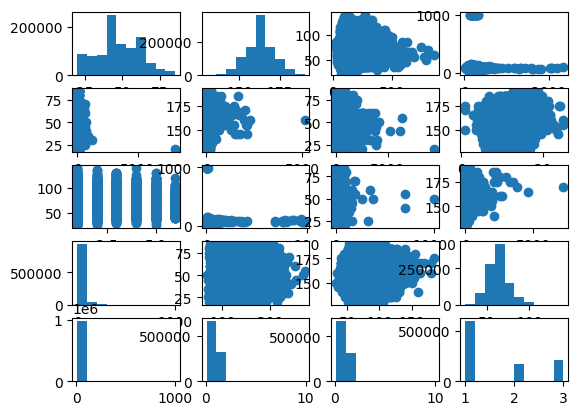

                 sex            age         height         weight  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean        0.531010      47.614491     162.240625      63.284050   
std         0.499038      14.181339       9.282957      12.514241   
min         0.000000      20.000000     130.000000      25.000000   
25%         0.000000      35.000000     155.000000      55.000000   
50%         1.000000      45.000000     160.000000      60.000000   
75%         1.000000      60.000000     170.000000      70.000000   
max         1.000000      85.000000     190.000000     140.000000   

           waistline     sight_left    sight_right      hear_left  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean       81.233358       0.980834       0.978429       1.031495   
std        11.850323       0.605949       0.604774       0.174650   
min         8.000000       0.100000       0.100000       1.000000   
25%        74.100000       0.7000

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

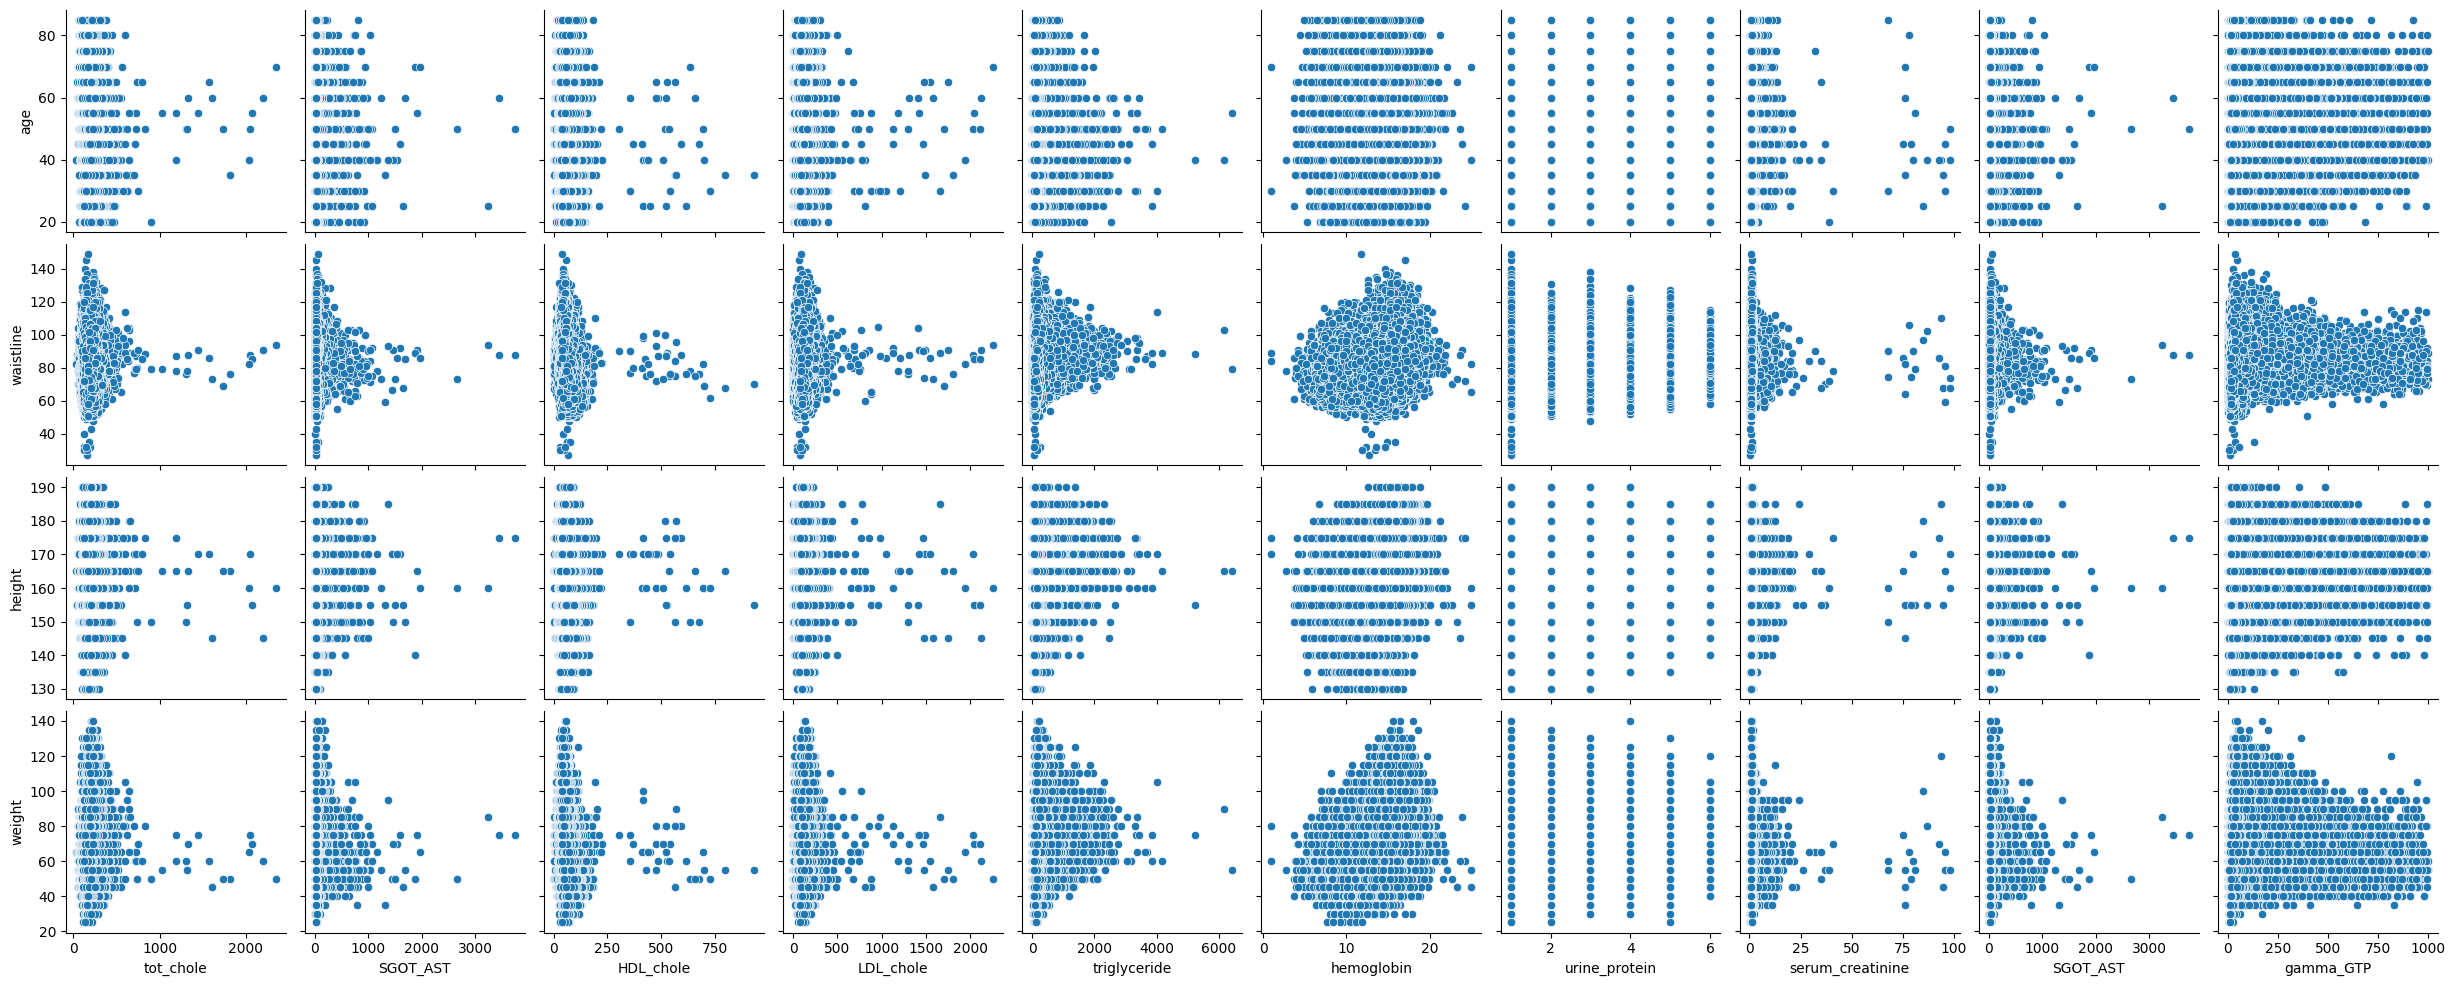

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline 

# read the datafile using panda library.  ensure right file location on machine. 
data = pd.read_csv(r"C:\Users\SAARTH CHAHAL\Downloads\smoking_driking_dataset_Ver01.csv") 
# .head() returns the first 5 rows of my dataset. This is useful if you want to see some example values for each variable.
data.head()
# .columns returns the name of all of your columns in the dataset.
data.columns
# .nunique(axis=0) returns the number of unique values for each variable.  
#  variables with low unique count have less variability are usually does not contain outliers 
#  Also they do not affect the mean and standard deviation. ex. sex, hear_left ,hear_right , SMK_stat_type_cd  etc. 
data.nunique(axis=0) 
# Convert sex as MALE or Female to number  
data['sex'] = np.where(data['sex'] == 'Male', 1,0 ) 
# Convert drinker as Y or N to Number
data['DRK_YN'] = np.where(data['DRK_YN'] == 'Y', 1,0 ) 

# Plotting scatter and histogram for various variables using matplotlib for identifying outliers.
plt.subplot(5,4,1)
plt.hist(data["age"])
plt.subplot(5,4,2)
plt.hist(data["height"])
plt.subplot(5,4,3)
plt.scatter(data["BLDS"],data["weight"])
plt.subplot(5,4,4)
plt.scatter(data["tot_chole"],data["waistline"])
plt.subplot(5,4,5)
plt.scatter(data["HDL_chole"],data["age"])
plt.subplot(5,4,6)
plt.scatter(data["LDL_chole"],data["height"])
plt.subplot(5,4,7)
plt.scatter(data["triglyceride"], data["age"])
plt.subplot(5,4,8)
plt.scatter(data["hemoglobin"],data["height"])
plt.subplot(5,4,9)
plt.scatter(data["urine_protein"],data["weight"])
plt.subplot(5,4,10)
plt.scatter(data["serum_creatinine"],data["waistline"])
plt.subplot(5,4,11)
plt.scatter(data["SGOT_AST"],data["age"])
plt.subplot(5,4,12)
plt.scatter(data["SGOT_ALT"],data["height"])
plt.subplot(5,4,13)
plt.hist(data["gamma_GTP"])
plt.subplot(5,4,14)
plt.scatter(data["SBP"],data["age"])
plt.subplot(5,4,15)
plt.scatter(data["DBP"],data["height"])
plt.subplot(5,4,16)
plt.hist(data["weight"]) 
plt.subplot(5,4,17)
plt.hist(data["waistline"]) 
plt.subplot(5,4,18)
plt.hist(data["sight_left"])
plt.subplot(5,4,19)
plt.hist(data["sight_right"])
plt.subplot(5,4,20)
plt.hist(data["SMK_stat_type_cd"])
plt.show() 

# Describe to Understanding the dataset. this is very starting point to understand the data potential outliers.
# General rule can be to check if max of min of the variables is severals std time ( about > 7) above 75% or 25% range
# Variable such as waistline (999, 8) , sigth (9.9) , HDL_chole , LDL_chole, triglyceride, SGOT_AST,
# SGOT_ALT , gamma_GTP   etc.  

print(data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))) 

# Cleaning dataset by removing null values using method.  on visual examination of data there was no null value
data_cleaned = data.dropna(axis=0)
# Cleaning  dataset by removing outliers 
# waistline range of 25 to 150 is based on observation of the data 
data_cleaned = data_cleaned[data_cleaned['waistline'].between(25,150)]   
# sight_left above 5 is based on observation of the data  
data_cleaned = data_cleaned[data_cleaned['sight_left'] < 5 ]
# sight_left above 5 is based on observation of the data  
data_cleaned = data_cleaned[data_cleaned['sight_right'] < 5 ]
#  HDL_chole above 1000  is outlier based on describe data finding and data examination
data_cleaned = data_cleaned[data_cleaned['HDL_chole'] < 1000 ] 
#  LDL_chole above 5000  is outlier based on describe data finding and data examination
data_cleaned = data_cleaned[data_cleaned['LDL_chole'] < 5000 ] 
# triglyceride above 9000 is outlier based on observation of the data  
data_cleaned = data_cleaned[data_cleaned['triglyceride'] < 9000 ]
# SGOT_AST above 7000 is outlier based on observation of the data  
data_cleaned = data_cleaned[data_cleaned['SGOT_AST'] < 7000 ]
# SGOT_ALT above 4000 is based on observation of the data  
data_cleaned = data_cleaned[data_cleaned['SGOT_ALT'] < 4000 ]
# Gamma_GTP above 998 is based on observation of the data  
data_cleaned = data_cleaned[data_cleaned['gamma_GTP'] < 999 ]

# Describe the cleaned data after removing the outliers . This will increase accuracy in data. 
# able to reduce variablity in the data after cleaning as is evident from std vlaues reduction of some of variable. 
# waistline(from 11.850323 to 9.592975) , sigth(0.605949 to 0.341178 ) ,  gamma_GTP ( 50.424153 to 48.110115)

print(data_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))) 

dfdata= pd.DataFrame(data_cleaned) 
# sns.pairplot for few variables 
sns.pairplot ( dfdata ,
x_vars=["tot_chole" , "SGOT_AST" ,"HDL_chole","LDL_chole","triglyceride","hemoglobin" , "urine_protein",
       "serum_creatinine", "SGOT_AST" ,"gamma_GTP" ] , 
 y_vars=["age" ,"waistline", "height" ,"weight"] , ) 


